# Script Contents
#### .01 Import Libraries & Data
#### .02 Explore Data
#### .03 Prepare Data for KNN
#### .04 Running the KNN Model
#### .05 Plotting the Results

## .01 Import Libraries & Data

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [77]:
path = r'C:\Users\jacks\ClimateWins\02 Data Sets'

In [78]:
# Import scaled weather data
df_scaled = pd.read_pickle(os.path.join(path, 'weather_scaled.pkl'))

In [79]:
# Import the pleasant weather answers data
df_pleasant = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

## .02 Explore Data

In [81]:
df_pleasant

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

In [82]:
df_pleasant.describe()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
count  2.295000e+04            22950.000000               22950.000000   
mean   1.990984e+07                0.246797                   0.348235   
std    1.813833e+05                0.431157                   0.476421   
min    1.960010e+07                0.000000                   0.000000   
25%    1.975092e+07                0.000000                   0.000000   
50%    1.991060e+07                0.000000                   0.000000   
75%    2.007021e+07                0.000000                   1.000000   
max    2.022103e+07                1.000000                   1.000000   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
count               22950.000000             22950.000000   
mean                    0.323791                 0.194292   
std                     0.467931                 0.395663   
min                     0.000000                 0.000000   
25%                     0.000000                 0.000000   
50%                     0.000000                 0.000000   
75%                     1.000000                 0.000000   
max                     1.000000                 1.000000   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
count                 22950.000000               22950.000000   
mean                      0.214989                   0.216078   
std                       0.410824                   0.411577   
min                       0.000000                   0.000000   
25%                       0.000000                   0.000000   
50%                       0.000000                   0.000000   
75%                       0.000000                   0.000000   
max                       1.000000                   1.000000   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
count             22950.000000                22950.000000   
mean                  0.164444                    0.277821   
std                   0.370686                    0.447935   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.000000                    1.000000   
max                   1.000000                    1.000000   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
count                 22950.000000             22950.000000   
mean                      0.207669                 0.446492   
std                       0.405647                 0.497140   
min                       0.000000                 0.000000   
25%                       0.000000                 0.000000   
50%                       0.000000                 0.000000   
75%                       0.000000                 1.000000   
max                       1.000000                 1.000000   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
count               22950.000000           22950.000000   
mean                    0.207712               0.155948   
std                     0.405679               0.362814   
min                     0.000000               0.000000   
25%                     0.000000               0.000000   
50%                     0.000000               0.000000   
75%                     0.000000               0.000000   
max                     1.000000               1.000000   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
count                     22950.0                22950.000000   
mean                          0.0                    0.169673   
std                           0.0                    0.375354   
min                           0.0                    0.000000   
25%                           0.0                    0.000000   
50%                           0.0                    0.000000   
75%                           0.0                    0.000000   
max                           0.0

In [83]:
df_scaled.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1           0.660514          -0.02793        0.826097   
1  19600102      1           0.244897          -0.02793        0.735760   
2  19600103      1           1.076130          -0.02793        1.277781   
3  19600104      1          -1.001953          -0.02793        1.458455   
4  19600105      1           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066            -0.265148   
1       -0.001949               -1.058108             1.658760   
2       -0.001949               -1.251420             0.155707   
3       -0.001949               -0.821838            -0.445514   
4       -0.001949               -0.746661            -0.164944   

   BASEL_snow_depth  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0         -0.179228       -0.902918        -0.528623       -0.845652   
1         -0.179228       -0.810126        -0.582946       -0.462450   
2         -0.179228       -1.065304        -0.257010       -0.186545   
3         -0.179228       -0.114186        -0.555784       -0.385810   
4         -0.179228        0.187388        -1.003946       -1.075573   

   BASEL_temp_max  BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0       -0.478356             -1.206433           0.905270           0.321771   
1       -0.569988              0.652846           1.119118           0.016838   
2       -0.592896              0.652846           0.620141           0.109644   
3       -0.512718              1.396557           1.760659           1.289601   
4       -1.039603              1.396557           2.188353           1.528244   

   BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                  -0.743149               -0.371315           0.283983   
1                  -1.418387               -0.371315          -1.333204   
2                  -0.968228               -0.371315          -0.524611   
3                  -1.418387               -0.371315          -1.333204   
4                  -1.418387               -0.253655          -1.333204   

   BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
0           -1.016876          -1.220210          -0.949203   
1           -1.107669          -0.818702          -1.298119   
2           -1.084971          -1.168403          -1.098738   
3           -1.209812          -1.362681          -1.437685   
4           -1.209812          -1.012980          -1.457623   

   BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0              -0.25524          -0.010098          -0.005876   
1              -0.25524          -0.010098          -0.005876   
2              -0.25524          -0.010098          -0.005876   
3              -0.25524          -0.010098          -0.005876   
4              -0.25524          -0.010098          -0.005876   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                  -1.118537               -0.321868          -0.773378   
1                  -1.415938                0.371622          -1.344065   
2                  -1.278676               -0.344984          -1.195190   
3                  -1.404499               -0.344984          -1.344065   
4                  -1.404499               -0.344984          -1.344065   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
0           -1.099163          -1.119431          -1.136839   
1           -1.110927          -0.878727          -1.341204   
2           -1.063873          -0.838610          -1.116403   
3           -1.146217          -1.012452          -1.208367   
4           -1.087400          -0.918844          -1.116403   

   DEBILT_cloud_cover  DEBILT_wind_speed  DEBILT_humidity  DEBILT_pressure  \
0            0.713782           2.781340         0.357839        -1.232471   
1            1.176060           

## .03 Prepare Data for KNN

In [85]:
print(df_scaled.columns.tolist())

['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_pr

In [86]:
print(df_pleasant.columns.tolist())

['DATE', 'BASEL_pleasant_weather', 'BELGRADE_pleasant_weather', 'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather', 'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather', 'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather', 'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather', 'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather', 'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather', 'VALENTIA_pleasant_weather']


In [87]:
# Gdansk, Roma, and Tours aren't included in the pleasant weather data

In [88]:
# We only need to use the tempurature data from the scaled weather data
# Reduce to temp variables and exclude all Gdansk, Roma,Tours columns
df_temp = df_scaled[['DATE', 'MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
 'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
 'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
 'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
 'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
 'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
 'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
 'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
 'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
 'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
 'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
 'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
 'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
 'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

In [89]:
# Create X and y dataframes and drop date/month columns
X = df_temp.drop(['DATE', 'MONTH'], axis=1)
y = df_pleasant.drop(['DATE'], axis=1)

In [90]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [91]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [92]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


## .04 Running the KNN Model

In [94]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


## .05 Plot Results

<function matplotlib.pyplot.show(close=None, block=None)>

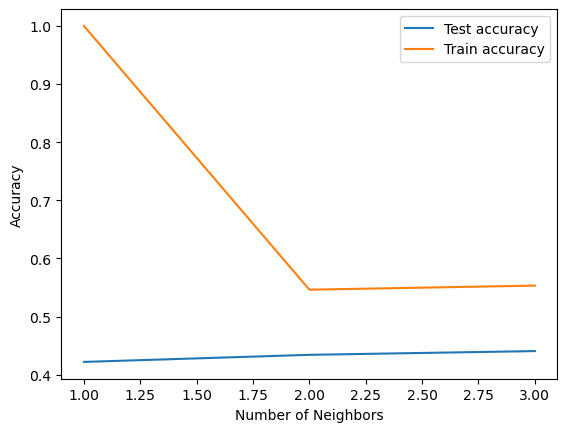

In [96]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

C:\Users\jacks\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


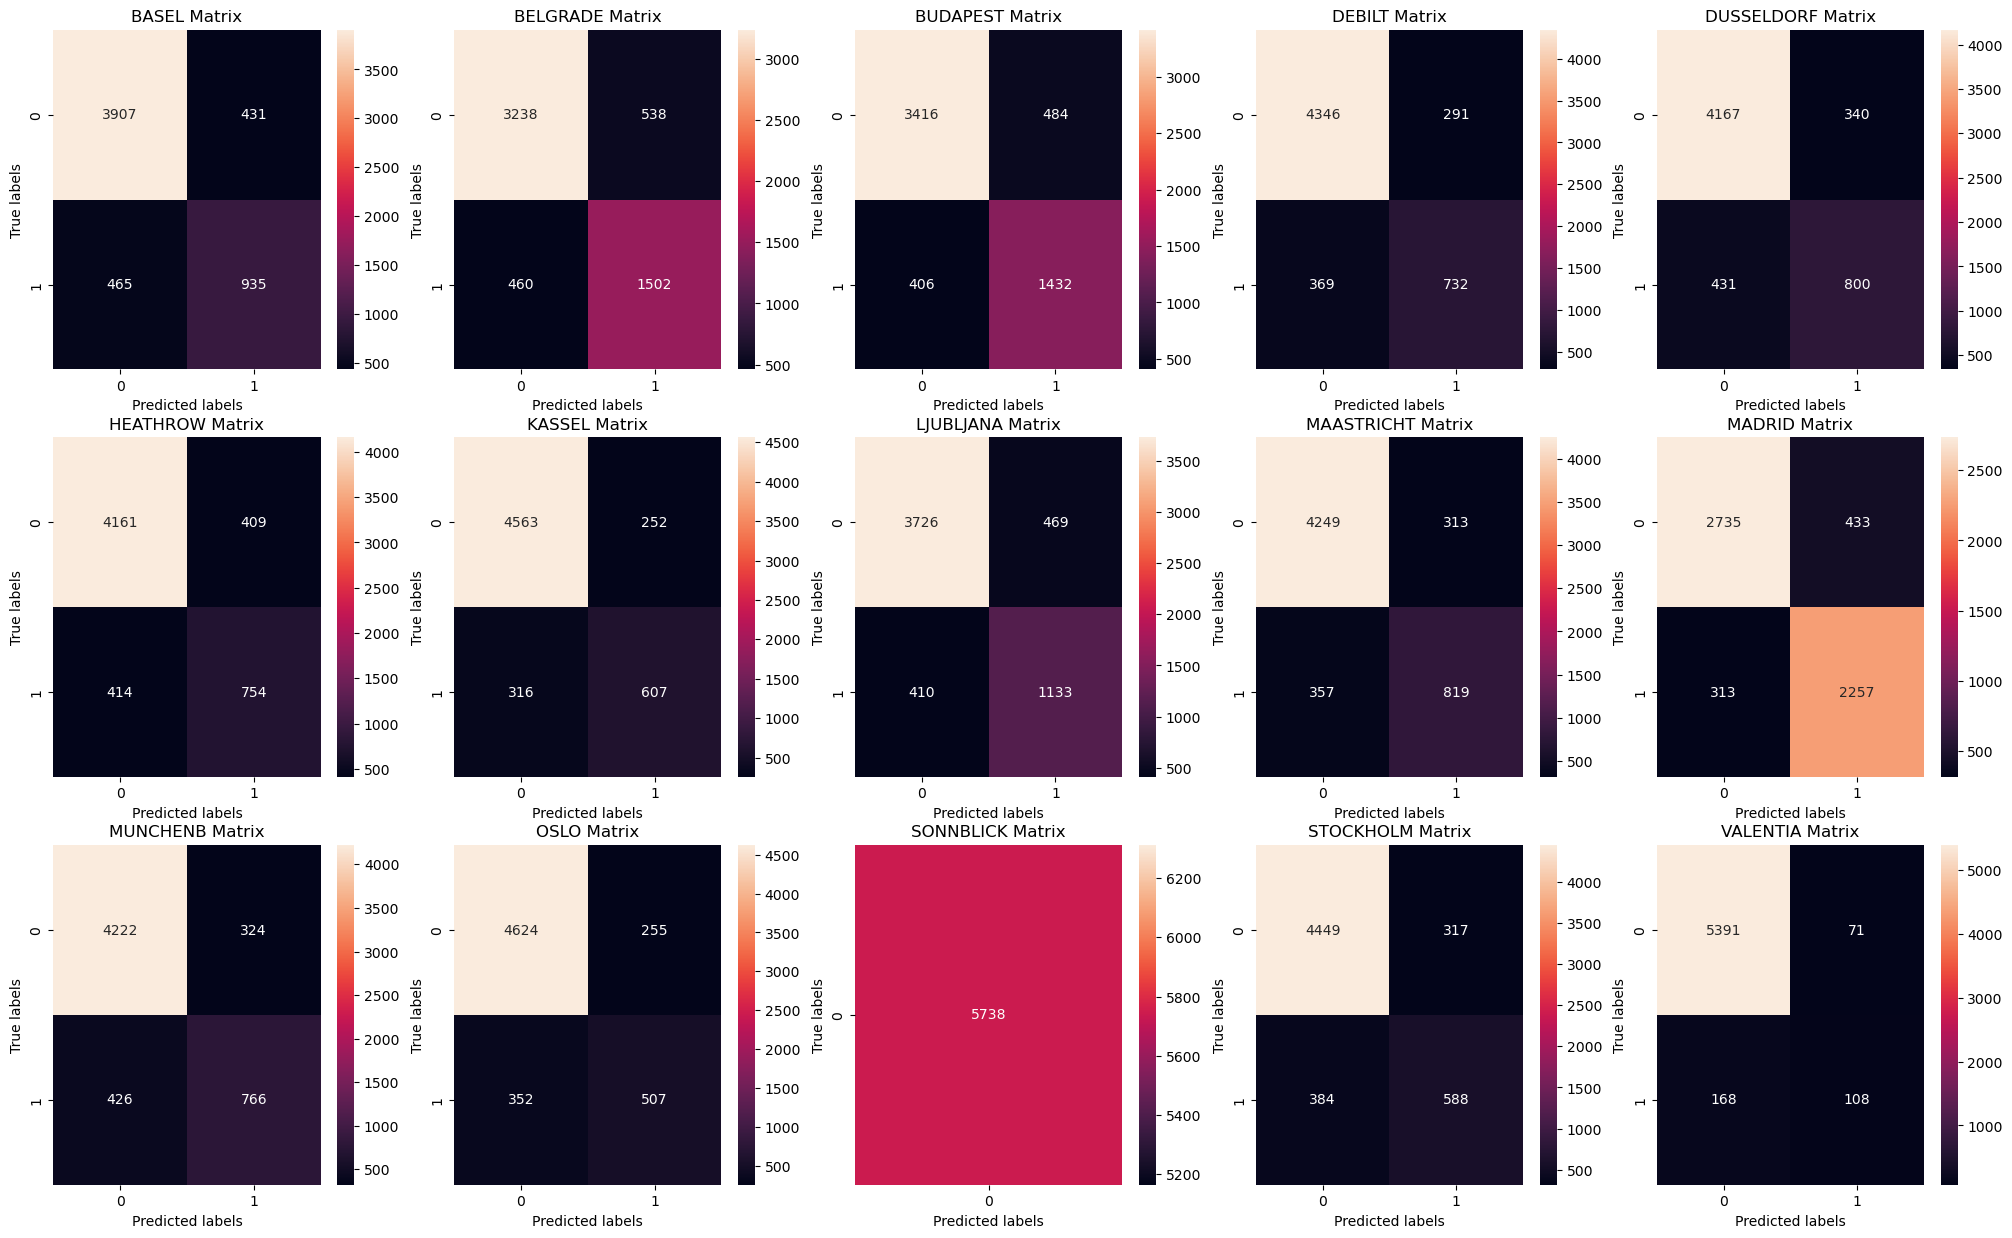

In [97]:
# Confusion matrix based on the last "k" in the sequence (Test data)
locations = list({x.split("_")[0] for x in df_temp.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

#### It appears the user warning above is caused by Sonnblick have zero pleasant days in the pleasant weather data.